In [223]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK, Sol_Kuramoto_mf2 as mf2

from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal, Quantile_Lorentzian as Q_Lorentzian

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from scipy import interpolate

import pandas as pd
from tqdm.notebook import tqdm
from parfor import parfor

In [ ]:
seed =11
N = 1000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
dt = 0.1
t = np.arange(0,10100,dt)
# K = 5.3
K = 7
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)

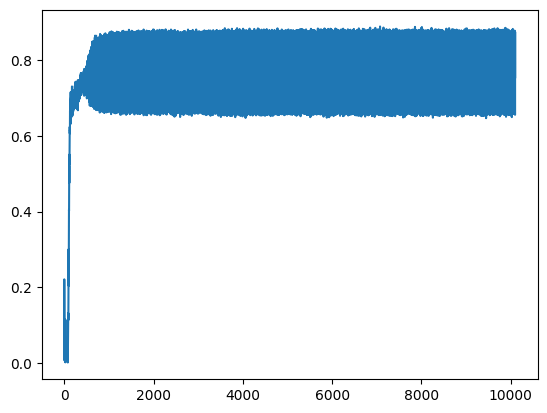

In [110]:
plt.plot(t,rs)

In [236]:
dict_r = {}

In [ ]:
seeds =np.arange(1,16,1)
ms = [4.3,4.4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3]
for m in ms:
    @parfor(seeds,(m,))
    def get_r(seed,m):
        N = 5000
        theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            # theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

        omega = omega - np.mean(omega)
        omega = np.sort(omega)
        dt = 0.1
        t = np.arange(0,10100,dt)
        # K = 5.3
        K = 8
        to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
        theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)

        avg_theta = (theta[-1] - theta[-1001])/(t[-1] - t[-1001])
        v_t = avg_theta
        expj = np.exp(1j*theta[-5090:])

        con0 = np.abs(v_t - v_t[N//2]) < 0.15
        c_0, = np.where(con0)
        c_p, = np.where(np.logical_and(~con0, omega > 0))
        c_m, = np.where(np.logical_and(~con0, omega < 0))
        r0 = np.mean(np.abs(np.sum(expj[:,c_0],axis=1)/N))
        rp = np.mean(np.abs(np.sum(expj[:,c_p],axis=1)/N))
        rm = np.mean(np.abs(np.sum(expj[:,c_m],axis=1)/N))
        rpl = np.mean(np.abs(np.sum(expj[:,c_p0],axis=1)/N))
        rml = np.mean(np.abs(np.sum(expj[:,c_m0],axis=1)/N))
        rs = np.mean(rs[-500:])
        N0,NP,NM = len(c_0),len(c_p0),len(c_m0)
        return r0,rp,rm,rs,rpl,rml,N0,NP,NM
    r0,rp,rm,rs,rpl,rml,N0,NP,NM = zip(*get_r)
    dict_r[m,'r0'] = r0
    dict_r[m,'rp'] = rp
    dict_r[m,'rm'] = rm
    dict_r[m,'rs'] = rs
    dict_r[m,'rpl'] = rpl
    dict_r[m,'rml'] = rml
    dict_r[m,'N0'] = N0
    dict_r[m,'NP'] = NP
    dict_r[m,'NM'] = NM

In [ ]:
seeds =np.arange(1,16,1)
ms = [4.3,4.4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3]
for m in ms:
    @parfor(seeds,(m,))
    def get_r(seed,m):
        N = 5000
        theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            # theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

        omega = omega - np.mean(omega)
        omega = np.sort(omega)
        dt = 0.1
        t = np.arange(0,10100,dt)
        # K = 5.3
        K = 8
        to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
        theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)

        avg_theta = (theta[-1] - theta[-1001])/(t[-1] - t[-1001])
        v_t = avg_theta
        expj = np.exp(1j*theta[-5090:])

        con0 = np.abs(v_t - v_t[N//2]) < 0.15
        c_0, = np.where(con0)
        c_p, = np.where(np.logical_and(~con0, omega > 0))
        c_m, = np.where(np.logical_and(~con0, omega < 0))
        r0 = np.mean(np.abs(np.sum(expj[:,c_0],axis=1)/N))
        rp = np.mean(np.abs(np.sum(expj[:,c_p],axis=1)/N))
        rm = np.mean(np.abs(np.sum(expj[:,c_m],axis=1)/N))
        rpl = np.mean(np.abs(np.sum(expj[:,c_p0],axis=1)/N))
        rml = np.mean(np.abs(np.sum(expj[:,c_m0],axis=1)/N))
        rs = np.mean(rs[-500:])
        N0,NP,NM = len(c_0),len(c_p0),len(c_m0)
        return r0,rp,rm,rs,rpl,rml,N0,NP,NM
    r0,rp,rm,rs,rpl,rml,N0,NP,NM = zip(*get_r)
    dict_r[m,'r0'] = r0
    dict_r[m,'rp'] = rp
    dict_r[m,'rm'] = rm
    dict_r[m,'rs'] = rs
    dict_r[m,'rpl'] = rpl
    dict_r[m,'rml'] = rml
    dict_r[m,'N0'] = N0
    dict_r[m,'NP'] = NP
    dict_r[m,'NM'] = NM

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [234]:
r0,rp,rm,rs = zip(*get_r)

In [188]:
r0s = []
rps = []
rms = []
rss = []
for m in [4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5]:
    for seed in tqdm(np.arange(1,11,1)):
        N = 1000
        theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
        # theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

        omega = omega - np.mean(omega)
        omega = np.sort(omega)
        dt = 0.1
        t = np.arange(0,10100,dt)
        # K = 5.3
        K = 7
        to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
        theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)

        avg_theta = (theta[-1] - theta[-1001])/(t[-1] - t[-1001])
        v_t = avg_theta


        con0 = np.abs(v_t - v_t[N//2]) < 0.15
        c_0, = np.where(con0)
        c_p, = np.where(np.logical_and(~con0, omega > 0))
        c_m, = np.where(np.logical_and(~con0, omega < 0))
        r0 = np.mean(np.abs(np.sum(np.exp(1j*theta[-500:,c_0]),axis=1)/N))
        rp = np.mean(np.abs(np.sum(np.exp(1j*theta[-500:,c_p]),axis=1)/N))
        rm = np.mean(np.abs(np.sum(np.exp(1j*theta[-500:,c_m]),axis=1)/N))
        rs = np.mean(rs[-500:])
        r0s.append(r0)
        rps.append(rp)
        rms.append(rm)
        rss.append(rs)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

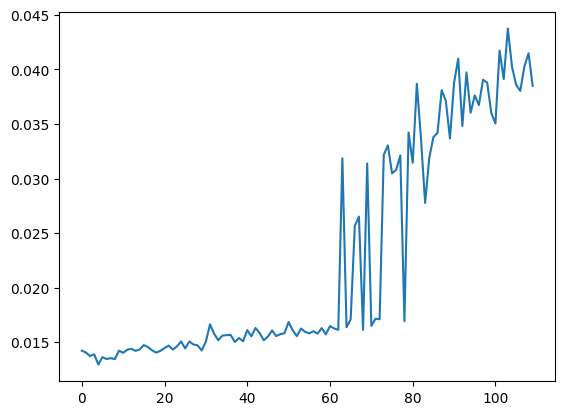

In [238]:
# plt.plot(r0s)
plt.plot(rps)

In [214]:
ms = [4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5]

In [216]:
for i,m in enumerate(ms):
    dict_r[m,'r0'] = r0s[10*i:10*i+10]
    dict_r[m,'rp'] = rps[10*i:10*i+10]
    dict_r[m,'rm'] = rms[10*i:10*i+10]
    dict_r[m,'rs'] = rss[10*i:10*i+10]

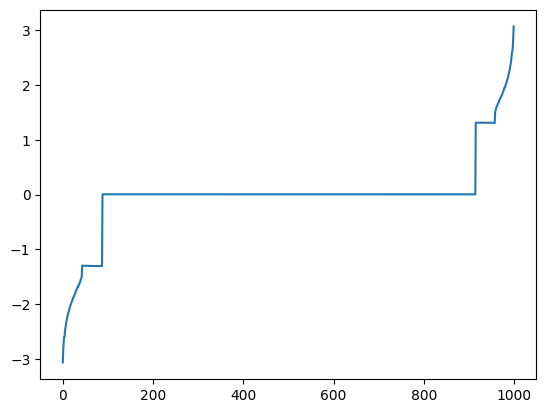

In [217]:
plt.plot(avg_theta)

In [143]:
np.mean(rps)

0.029508400531635608

In [190]:
ms,keys = zip(*dict_r.keys())
ms = np.sort(list(set(ms)))

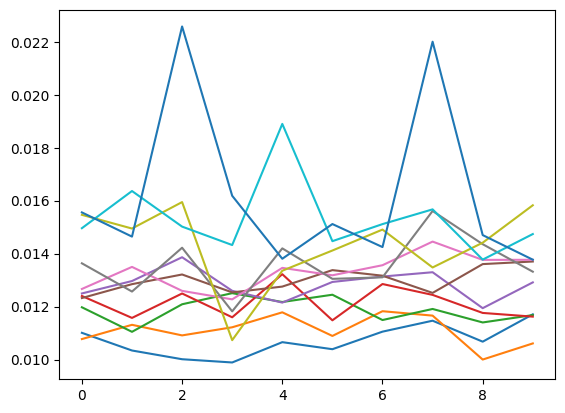

In [255]:
# for m in ms:
#     plt.plot(dict_r[m,'r0'])
# plt.plot(r0s)


for m in ms:
    plt.plot(dict_r[m,'rm'])

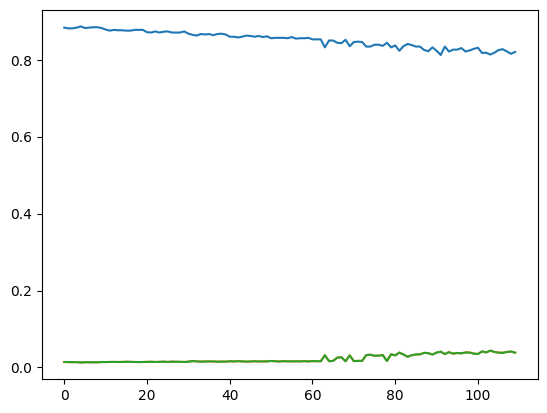

In [192]:
plt.plot(r0s)
plt.plot(rps)
plt.plot(rps)

In [ ]:


r_s = np.mean(rs[-500:])
a = 1/np.sqrt(K*r_s*m)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)

OPS = b*K*r_s

a = 1/np.sqrt(K*rm*m)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)

opp = b*K*rm



# opp = 4/np.pi * np.sqrt(K*rp/m) - 0.3056/np.sqrt(K*rp*m**3)
dps =  1/2 *m*K*K*r0*rp/(m**2 * OPS**2 + 1) + K*K* rp*rp/(4*OPS*(1+4*OPS**2*m**2))

In [113]:
a = 1/np.sqrt(K*r_s*m)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)

OPS2 = b*K*r_s

In [ ]:
idx = -1
avg_theta = (theta[idx] - theta[idx-1001])/(t[idx] - t[idx-1001])
v_t = avg_theta

con0 = np.abs(v_t - v_t[N//2]) < 0.15
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))


c_p1

r0 = np.mean(np.abs(np.sum(np.exp(1j*theta[-500:,c_0]),axis=1)/N))
rp = np.mean(np.abs(np.sum(np.exp(1j*theta[-500:,c_p]),axis=1)/N))
rm = np.mean(np.abs(np.sum(np.exp(1j*theta[-500:,c_m]),axis=1)/N))

r_s = np.mean(rs[idx-500:idx])
a = 1/np.sqrt(K*r_s*m)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)
OPS = b*K*r_s
a = 1/np.sqrt(K*rm*m)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)
opp = b*K*rm
dps =  1/2 *m*K*K*r0*rp/(m**2 * OPS**2 + 1) + K*K* rp*rp/(4*OPS*(1+4*OPS**2*m**2))

In [ ]:
N = 5000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
dt = 0.1
t = np.arange(0,10100,dt)
# K = 5.3
m = 4.4
K = 7
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)

avg_theta = (theta[-1] - theta[-1001])/(t[-1] - t[-1001])
v_t = avg_theta


con0 = np.abs(v_t - v_t[N//2]) < 0.15
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))

conp = np.abs(v_t - np.min(v_t[c_p])) < 0.02
conm = np.abs(v_t - np.max(v_t[c_m])) < 0.02
c_p0, = np.where(conp)
c_m0, = np.where(conm)

expj = np.exp(1j*theta[-500:])
r0 = np.mean(np.abs(np.sum(expj[:,c_0],axis=1)/N))
rp = np.mean(np.abs(np.sum(expj[:,c_p],axis=1)/N))
rm = np.mean(np.abs(np.sum(expj[:,c_m],axis=1)/N))

rpl = np.mean(np.abs(np.sum(expj[:,c_p0],axis=1)/N))
rml = np.mean(np.abs(np.sum(expj[:,c_m0],axis=1)/N))


In [313]:
con0 = np.abs(v_t - v_t[N//2]) < 0.15
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))

conp = np.abs(v_t - np.min(v_t[c_p])) < 0.02
conm = np.abs(v_t - np.max(v_t[c_m])) < 0.02
c_p0, = np.where(conp)
c_m0, = np.where(conm)

expj = np.exp(1j*theta[-5090:])
r0 = np.mean(np.abs(np.sum(expj[:,c_0],axis=1)/N))
rp = np.mean(np.abs(np.sum(expj[:,c_p],axis=1)/N))
rm = np.mean(np.abs(np.sum(expj[:,c_m],axis=1)/N))

rpl = np.mean(np.abs(np.sum(expj[:,c_p0],axis=1)/N))
rml = np.mean(np.abs(np.sum(expj[:,c_m0],axis=1)/N))
N0,NP,NM = len(c_0),len(c_p0),len(c_m0)
N0,NP,NM

(4268, 117, 122)

In [314]:
conp = np.abs(v_t - np.min(v_t[c_p])) < 0.02
conm = np.abs(v_t - np.max(v_t[c_m])) < 0.02
c_p0, = np.where(conp)
c_m0, = np.where(conm)

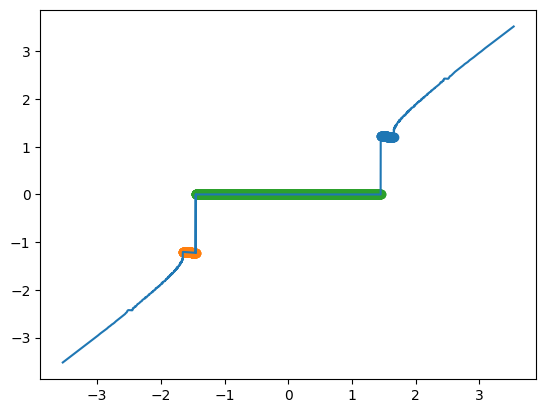

In [315]:
plt.scatter(omega[c_p0],avg_theta[c_p0])
plt.scatter(omega[c_m0],avg_theta[c_m0])
plt.scatter(omega[c_0],avg_theta[c_0])
plt.plot(omega,avg_theta)

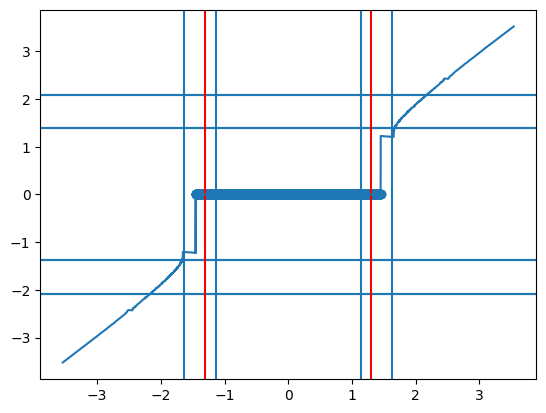

In [311]:
plt.scatter(omega[c_0],avg_theta[c_0])
for i in range(2):
    plt.axvline((-1)**i*(OPS+dps-opp))
    plt.axvline((-1)**i*(OPS+dps+opp))
    
    plt.axhline(1.5*(-1)**i*(OPS+dps) +v_t[N//2])
    plt.axhline(1.5*(-1)**i*(OPS+dps) +v_t[N//2])
    plt.axhline(1*(-1)**i*(OPS+dps) +v_t[N//2])
    plt.axhline(1*(-1)**i*(OPS+dps) +v_t[N//2])
# plt.axhline(OPS)

plt.axvline(OPS,color='red')
plt.axvline(-OPS,color='red')
plt.plot(omega,avg_theta)

In [123]:
mcs_rp0 = np.load('Simul/mcs_rp0.npz',allow_pickle=True)
mcs_rpdh = np.load('Simul/mcs_rpdh.npz',allow_pickle=True)


In [126]:
F_rp0u = interpolate.interp1d(K_rp0u,ms_rp0)
F_rpdhu = interpolate.interp1d(K_rpdhu,ms_rpdh)


In [296]:
F_rp0u(K), F_rpdhu(K)

(array(4.17448765), array(4.41885978))

In [170]:
# 저장된 npz 파일 로드
loaded_data = np.load('Simul/RR_RP.npz', allow_pickle=True)
# 딕셔너리로 변환
# RR = dict(loaded_data.item())  # .item()을 사용해 원래 딕셔너리로 변환

Ks_ = np.arange(0,10.01,0.1)
ms_ = np.arange(0,10.02,0.1)
KK,MM = np.meshgrid(Ks_,ms_,indexing='ij')


In [172]:
R0 = loaded_data['R0']
R = loaded_data['R']
RP = loaded_data['RP']
RD = R -R0

In [239]:
dict_r

{(4, 'r0'): (0.8734103656423335,
  0.8730223021634024,
  0.8738057635081148,
  0.872613473665308,
  0.872620969782452,
  0.8738085505239329,
  0.8732095160739081,
  0.8730222753643213,
  0.8728232872679941,
  0.8728179462967565),
 (4, 'rp'): (0.015020845080217286,
  0.01509671509781611,
  0.014765317252147442,
  0.014922039597437271,
  0.014987509731009006,
  0.014784620092219598,
  0.014937574612027589,
  0.014967370321887689,
  0.014920725917241438,
  0.014954646048864394),
 (4, 'rm'): (0.014797670712773946,
  0.014924601534154308,
  0.014775445771824153,
  0.01514233281444341,
  0.015120210099163952,
  0.014736224113170104,
  0.014871890296820548,
  0.014895741311694152,
  0.01502245539650254,
  0.015176123603969562),
 (4, 'rs'): (0.8442418287526562,
  0.8436746653576354,
  0.8448740972337717,
  0.8431635378844561,
  0.843111596124225,
  0.8448974223583245,
  0.8440866266056741,
  0.8438118687897984,
  0.8435231935858878,
  0.8433887423526949),
 (4.1, 'r0'): (0.8673113163659244,
  0

4.3
4.4
4.5
4.6
4.7
4.8
4.9
5
5.1
5.2
5.3


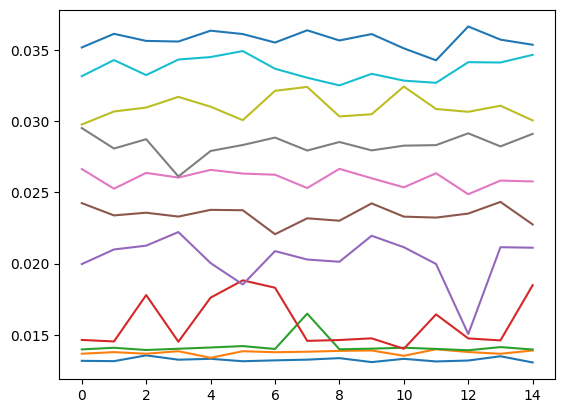

In [263]:
# for m in ms:
#     plt.plot(dict_r[m,'r0'])
# plt.plot(r0s)
ms = [4.3,4.4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3]
ms_rp = []
for m in ms:
    print(m)
    plt.plot(dict_r[m,'rp'])
    ms_rp.append(dict_r[m,'rp'])
mean_rp = np.mean(ms_rp,axis=1)
max_rp = np.max(ms_rp,axis=1)
min_rp = np.min(ms_rp,axis=1)
std_rp = np.std(ms_rp,axis=1)

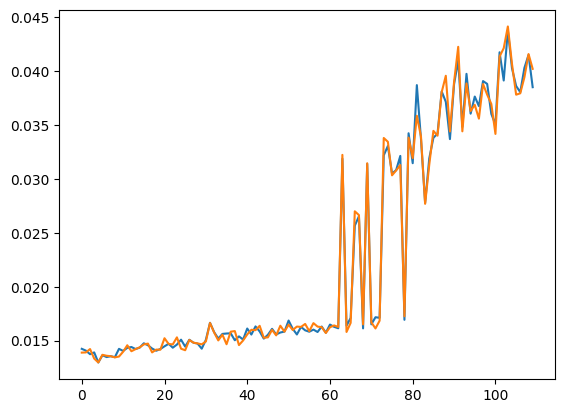

In [264]:
plt.plot(rps)
plt.plot(rms)

(0.0, 0.05)

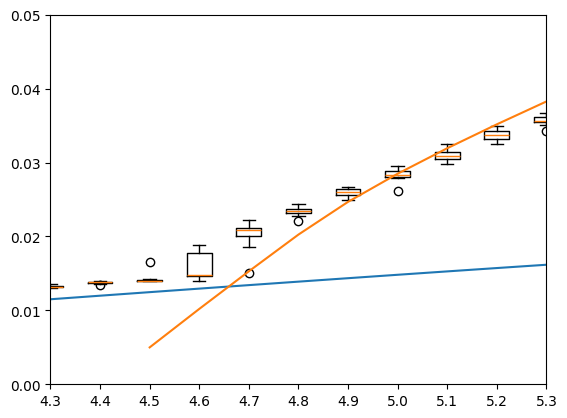

In [267]:
# plt.scatter(ms,mean_rp)
# plt.scatter(ms,max_rp)
# plt.scatter(ms,min_rp)
plt.boxplot(ms_rp,positions=ms,widths=0.05)
plt.plot(ms_,np.abs(RD[:,80])/2)
plt.plot(ms_,np.abs(RP[:,80]))

plt.xlim(4.3,5.3)
plt.ylim(0,0.05)

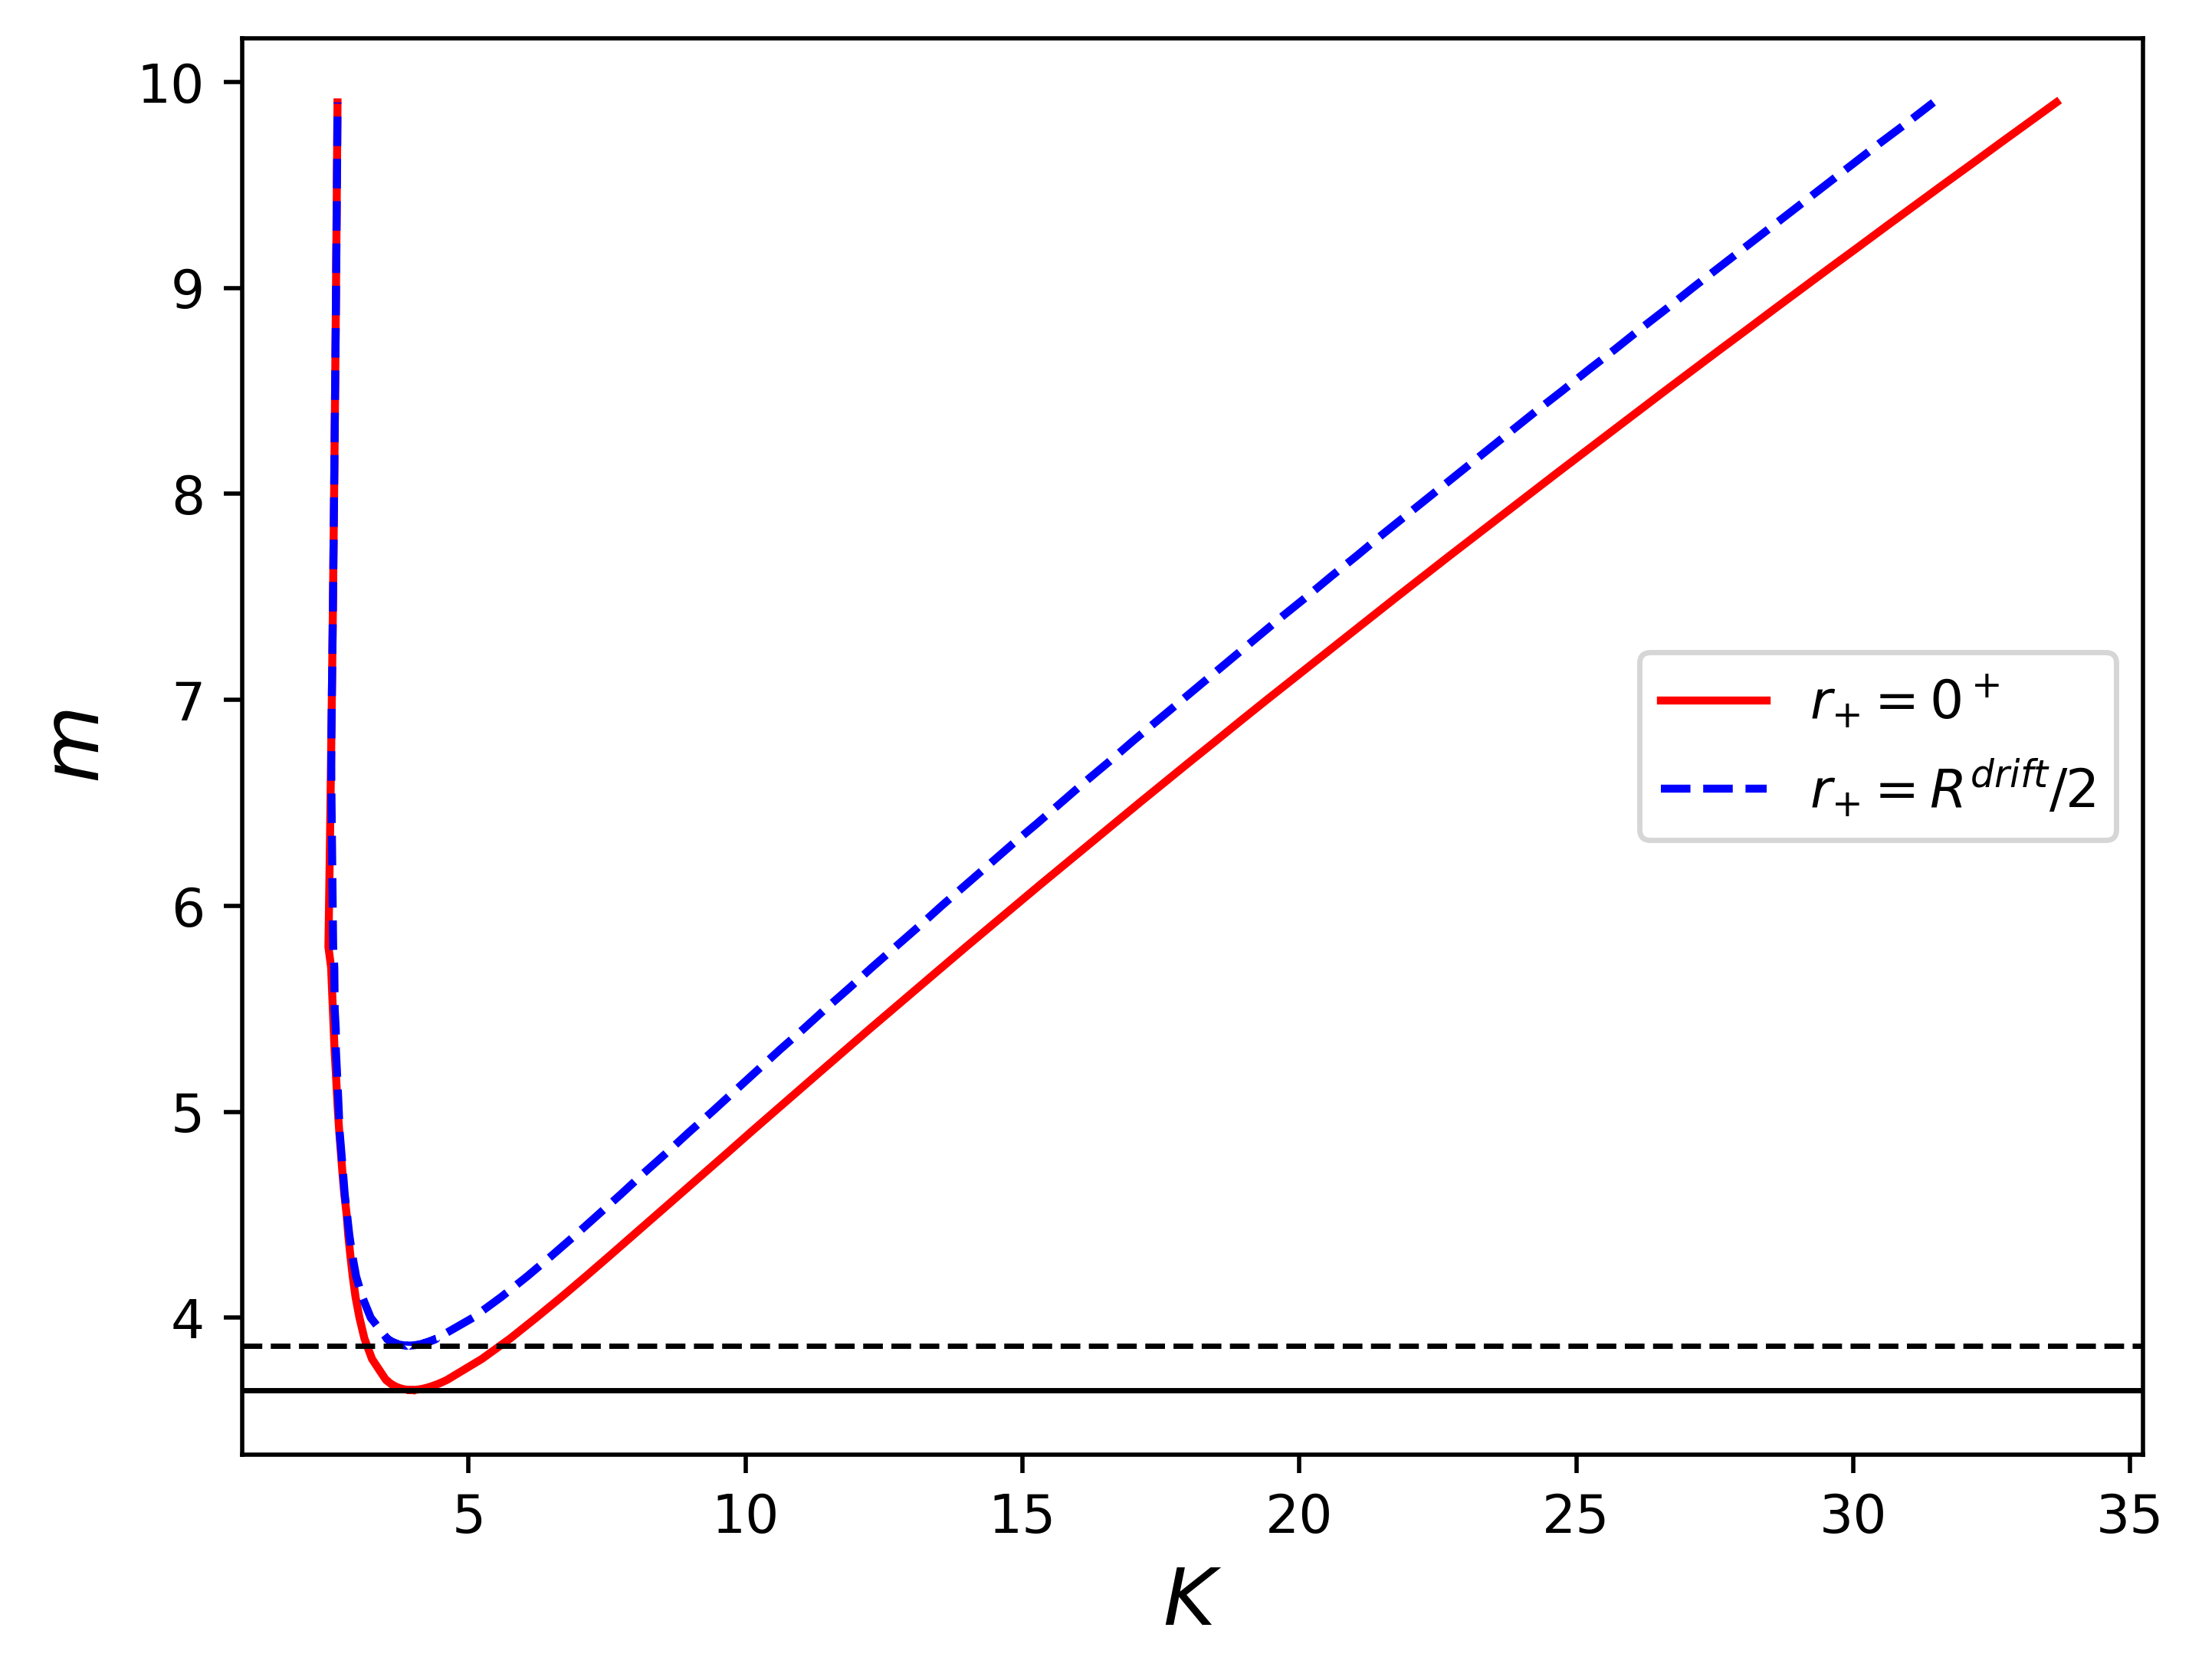

In [124]:
ms_rp0=mcs_rp0['ms']
K_rp0u=mcs_rp0['K_u']
K_rp0d=mcs_rp0['K_d']

ms_rpdh=mcs_rpdh['ms']
K_rpdhu=mcs_rpdh['K_u']
K_rpdhd=mcs_rpdh['K_d']

plt.figure(dpi=500)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')

plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.axhline(np.min(ms_rp0),ls='-',c='k',lw=1)
plt.axhline(np.min(ms_rpdh),ls='--',c='k',lw=1)
plt.legend()